# Preprocessing tweet data
---

# 1. Import required modules

## 1.1. To install all required libraries

In [2]:
# Uncomment below line to install all the required dependencies
# !pip install -r ../requirements.txt -q

## 1.2. Imports

In [3]:
import re

import numpy as np
import pandas as pd
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---

# 2. Understanding the dataset

## 2.1. Load dataset

In [4]:
cols = ['sentiment', 'tweet_id', 'timestamp', 'query', 'user', 'text']
df = pd.read_csv('./dataset.csv', names=cols)

In [5]:
df.head()

,sentiment,tweet_id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 2.2. Positive tweets

In [6]:
df[df.sentiment != 0].head()

,sentiment,tweet_id,timestamp,query,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


## 2.3. Negative tweets

In [7]:
df[df.sentiment != 4].head()

,sentiment,tweet_id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 2.4. Number of tweets

In [8]:
df[df.sentiment != 0].shape

(800000, 6)

- Number of Negative tweets

In [9]:
df[df.sentiment != 4].shape

(800000, 6)

- Number of Positive tweets

In [10]:
data = [['negative', df[df.sentiment != 0].shape[0]], ['posistive', df[df.sentiment != 4].shape[0]]]
number_of_tweets_df = pd.DataFrame(data, columns = ['Sentiment', 'Number of tweets'])
number_of_tweets_df

,Sentiment,Number of tweets
0,negative,800000
1,posistive,800000


<AxesSubplot:xlabel='Sentiment', ylabel='Number of tweets'>

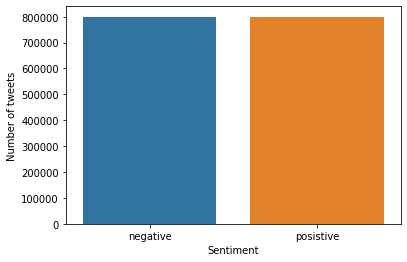

In [11]:
sns.barplot(x = 'Sentiment', y = 'Number of tweets', data = number_of_tweets_df)

---

# 3. Make sentiments either 0 or 1

In [12]:
df[df.sentiment != 0].head()

,sentiment,tweet_id,timestamp,query,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [13]:
df['sentiment'] = df['sentiment']//4

In [14]:
df[df.sentiment != 1].head()

,sentiment,tweet_id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
df[df.sentiment != 0].head()

,sentiment,tweet_id,timestamp,query,user,text
800000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


---

# 4. Drop columns

In [16]:
df = df[['sentiment', 'text']]
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


---

# 5. Clean tweets


In [17]:
emoji_pattern = re.compile (
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002720-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags = re.UNICODE,        
)

stop = set(stopwords.words("english"))

def clean_tweet(tweet):
    # Remove @ mentions
    cleaned_tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    
    # Remove hashtags
    cleaned_tweet = re.sub(r'#[A-Za-z0-9_]+', '', cleaned_tweet)
    
    # Remove hyperlinks
    cleaned_tweet = re.sub(r'https?://[A-Za-z0-9_./?]+', '', cleaned_tweet)
    
    # Remove special characters
    cleaned_tweet = re.sub(r'&[a-zA-Z0-9_]+;', '', cleaned_tweet)
    
    # Remove html
    cleaned_tweet = re.sub(r'<.*?>', '', cleaned_tweet)
    
    # Remove emojis
    cleaned_tweet = emoji_pattern.sub(r'', cleaned_tweet)
    
    # Remove punctuations
    cleaned_tweet = re.sub(r'[-,:;.?<>()!%=_*&^$/]', ' ', cleaned_tweet)
    
    # Remove apostrphe
    cleaned_tweet = re.sub(r'[\']', '', cleaned_tweet)
    
    # Remove numbers
    cleaned_tweet = re.sub(r'[0-9]+', '', cleaned_tweet)
    
    # Remove all single characters
    cleaned_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned_tweet)
    
    # Substituting multiple spaces with single space
    cleaned_tweet= re.sub(r'\s+', ' ', cleaned_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    cleaned_tweet = re.sub(r'^b\s+', '', cleaned_tweet)
 
    # Converting to Lowercase
    cleaned_tweet = cleaned_tweet.lower()
    
    # Remove stop words
    cleaned_tweet = " ".join([word for word in cleaned_tweet.split() if word not in stop])
    
    return cleaned_tweet


In [18]:
cleaned_tweets = []

for tweet in df['text']:
#     print("Tweet:", tweet)
#     print()
#     print("Cleaned Tweet:", clean_tweet(tweet))
#     print()
#     print()    
    cleaned_tweets.append(clean_tweet(tweet))

df['cleaned_tweet'] = cleaned_tweets

In [19]:
df.head()

,sentiment,text,cleaned_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


# 6. Porter Stemmer

In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
stemmed_tweets = []
ps = PorterStemmer()
for tweet in df['cleaned_tweet']:
    words = word_tokenize(tweet)
    temp = []
    for w in words:
        root = ps.stem(w)
        temp.append(root)
    temp =' '.join(temp)
    stemmed_tweets.append(temp)

df['Porter_Stem'] = stemmed_tweets

In [22]:
df.head()

,sentiment,text,cleaned_tweet,Porter_Stem
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...,awww that bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see,behav im mad cant see


# 7. Snowball Stemmer

In [23]:
from nltk.stem.snowball import SnowballStemmer

In [24]:
stemmed_tweets = []
ss = SnowballStemmer("english")
for tweet in df['cleaned_tweet']:
    words = word_tokenize(tweet)
    temp = []
    for w in words:
        root = ss.stem(w)
        temp.append(root)
    temp =' '.join(temp)
    stemmed_tweets.append(temp)
    
df['Snowball_Stem'] = stemmed_tweets

In [25]:
df.head()

,sentiment,text,cleaned_tweet,Porter_Stem,Snowball_Stem
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...,awww that bummer shoulda got david carr third day,awww that bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,dive mani time ball manag save rest go bound,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole bodi feel itchi like fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see,behav im mad cant see,behav im mad cant see


In [ ]:
df.to_csv("./cleaned_tweets.csv", index = False)

---